In [19]:
import numpy as np #i just like to have this
import pandas as pd #dfs lul
import tiktoken # for counting tokens
import openai #for generating embeddings
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
sns.set_style("darkgrid")

In [20]:
#reference: https://github.com/openai/openai-cookbook/blob/297c53430cad2d05ba763ab9dca64309cb5091e9/examples/Embedding_Wikipedia_articles_for_search.ipynb
results2 = pd.read_json(r"C:\Users\kaush\Desktop\fuck_you_chatPAL\pal\eval_results\gsm_complex_prompt_baseline_acc83.02.chat.jsonl",lines=True)
df = results2
questions = df["input"].values.tolist()
GPT_MODEL = "gpt-3.5-turbo" #for tokenizer selection

In [21]:
def num_tokens(text: str, model: str = GPT_MODEL) -> int:
    """Return the number of tokens in a string."""
    encoding = tiktoken.encoding_for_model(model)
    return len(encoding.encode(text))

In [22]:
token_counts = [num_tokens(question) for question in questions]

In [23]:
df["token_counts"] = token_counts

Mininum tokens to encode: 22
Maximum tokens to encode: 185


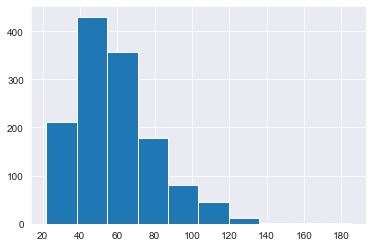

In [25]:
plt.hist(token_counts)
print(f"Mininum tokens to encode: {min(token_counts)}")
print(f"Maximum tokens to encode: {max(token_counts)}")
#GPT 3.5 can use upto 4096 tokens so we are more than ok here.